<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/cnn/lstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 17s 53ms/step - loss: 0.6691 - accuracy: 0.5535 - val_loss: 0.4425 - val_accuracy: 0.7854
Epoch 2/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3685 - accuracy: 0.8503 - val_loss: 0.3728 - val_accuracy: 0.8477
Epoch 3/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3121 - accuracy: 0.8745 - val_loss: 0.3155 - val_accuracy: 0.8702
Epoch 4/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2418 - accuracy: 0.9065 - val_loss: 0.2933 - val_accuracy: 0.8800
Epoch 5/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2001 - accuracy: 0.9264 - val_loss: 0.3319 - val_accuracy: 0.8738
Epoch 6/100
176/176 [==============================] - 9s 51ms/step - loss: 0.1877 - accuracy: 0.9310 - val_loss: 0.3189 - val_accuracy: 0.8657
Epoch 7/100
176/176 [==============================] - 9s 50ms/step - loss: 0.1977 - accuracy: 0.9282 - val_loss: 0.39

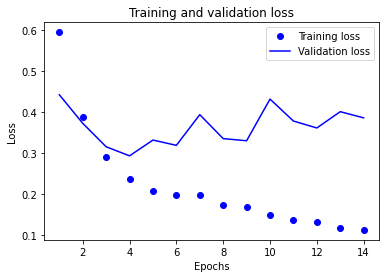

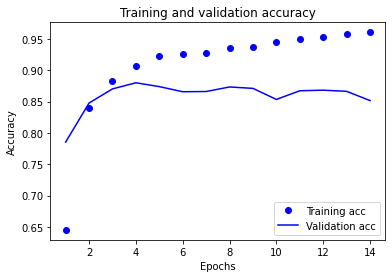

              precision    recall  f1-score   support

           0      0.881     0.878     0.880     12500
           1      0.879     0.882     0.880     12500

    accuracy                          0.880     25000
   macro avg      0.880     0.880     0.880     25000
weighted avg      0.880     0.880     0.880     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 11s 52ms/step - loss: 0.6698 - accuracy: 0.6124 - val_loss: 0.4161 - val_accuracy: 0.8297
Epoch 2/100
176/176 [==============================] - 9s 49ms/step - loss: 0.3631 - accuracy: 0.8530 - val_loss: 0.3110 - val_accuracy: 0.8716
Epoch 3/100
176/176 [==============================] - 9s 49ms/step - loss: 0.2735 - accuracy: 0.8938 - val_loss: 0.3022 - val_accuracy: 0.8765
Epoch 4/100
176/176 [==============================] - 9s 49ms/step - loss: 0.2279 - accuracy: 0.9149 - val_loss: 0.2957 - val_accuracy: 0.8806
Epoch 5/100
176/176 [==============================] - 9s 49ms/step - loss: 0.

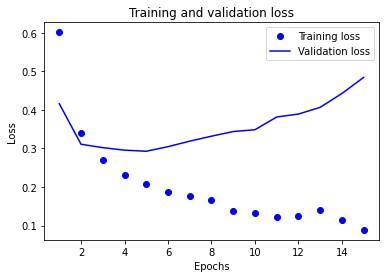

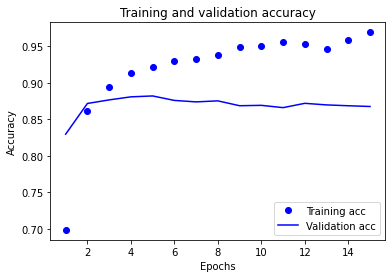

              precision    recall  f1-score   support

           0      0.881     0.884     0.882     12500
           1      0.883     0.880     0.882     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 11s 52ms/step - loss: 0.6553 - accuracy: 0.5951 - val_loss: 0.3779 - val_accuracy: 0.8375
Epoch 2/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3140 - accuracy: 0.8731 - val_loss: 0.3091 - val_accuracy: 0.8743
Epoch 3/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2615 - accuracy: 0.9007 - val_loss: 0.2991 - val_accuracy: 0.8768
Epoch 4/100
176/176 [==============================] - 9s 49ms/step - loss: 0.2157 - accuracy: 0.9182 - val_loss: 0.3374 - val_accuracy: 0.8758
Epoch 5/100
176/176 [==============================] - 9s 49ms/step - loss: 0.

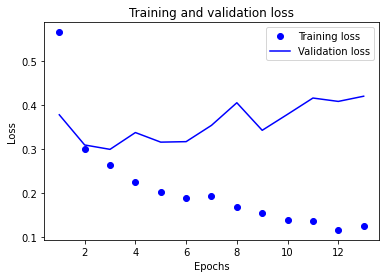

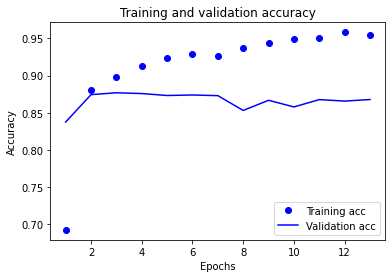

              precision    recall  f1-score   support

           0      0.885     0.866     0.876     12500
           1      0.869     0.888     0.878     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 10s 52ms/step - loss: 0.6465 - accuracy: 0.5883 - val_loss: 0.3759 - val_accuracy: 0.8424
Epoch 2/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3253 - accuracy: 0.8685 - val_loss: 0.3396 - val_accuracy: 0.8554
Epoch 3/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2855 - accuracy: 0.8871 - val_loss: 0.3544 - val_accuracy: 0.8668
Epoch 4/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2340 - accuracy: 0.9113 - val_loss: 0.2999 - val_accuracy: 0.8765
Epoch 5/100
176/176 [==============================] - 9s 50ms/step - loss: 0.

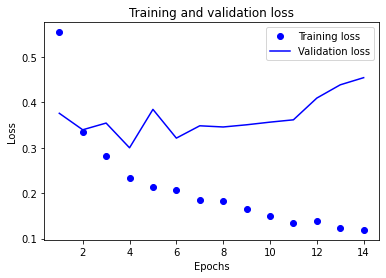

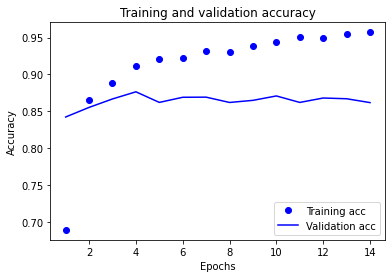

              precision    recall  f1-score   support

           0      0.888     0.862     0.875     12500
           1      0.866     0.891     0.878     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.876     25000
weighted avg      0.877     0.876     0.876     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 11s 52ms/step - loss: 0.6211 - accuracy: 0.6252 - val_loss: 0.3439 - val_accuracy: 0.8534
Epoch 2/100
176/176 [==============================] - 9s 49ms/step - loss: 0.2980 - accuracy: 0.8853 - val_loss: 0.3005 - val_accuracy: 0.8753
Epoch 3/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2393 - accuracy: 0.9081 - val_loss: 0.3078 - val_accuracy: 0.8709
Epoch 4/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2230 - accuracy: 0.9166 - val_loss: 0.3074 - val_accuracy: 0.8756
Epoch 5/100
176/176 [==============================] - 9s 50ms/step - loss: 0.

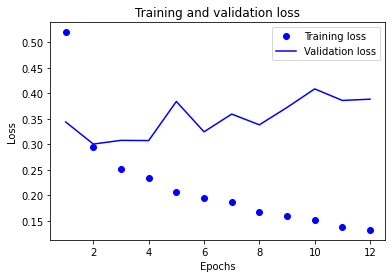

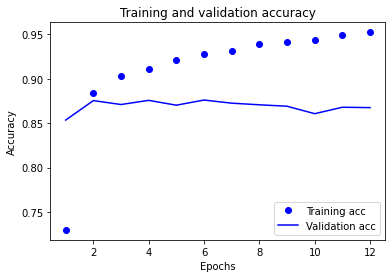

              precision    recall  f1-score   support

           0      0.865     0.889     0.877     12500
           1      0.886     0.862     0.874     12500

    accuracy                          0.875     25000
   macro avg      0.876     0.875     0.875     25000
weighted avg      0.876     0.875     0.875     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 11s 52ms/step - loss: 0.6423 - accuracy: 0.6063 - val_loss: 0.3632 - val_accuracy: 0.8470
Epoch 2/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3157 - accuracy: 0.8703 - val_loss: 0.3323 - val_accuracy: 0.8668
Epoch 3/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2526 - accuracy: 0.9035 - val_loss: 0.3204 - val_accuracy: 0.8704
Epoch 4/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2281 - accuracy: 0.9120 - val_loss: 0.3525 - val_accuracy: 0.8458
Epoch 5/100
176/176 [==============================] - 9s 50ms/step - loss: 0.

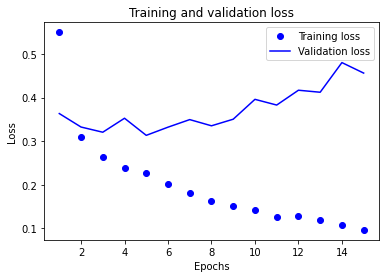

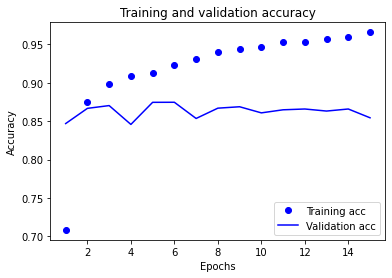

              precision    recall  f1-score   support

           0      0.883     0.864     0.873     12500
           1      0.867     0.885     0.876     12500

    accuracy                          0.875     25000
   macro avg      0.875     0.875     0.875     25000
weighted avg      0.875     0.875     0.875     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 11s 52ms/step - loss: 0.6488 - accuracy: 0.6072 - val_loss: 0.3788 - val_accuracy: 0.8329
Epoch 2/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3261 - accuracy: 0.8635 - val_loss: 0.3040 - val_accuracy: 0.8734
Epoch 3/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2615 - accuracy: 0.8961 - val_loss: 0.3114 - val_accuracy: 0.8763
Epoch 4/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2264 - accuracy: 0.9122 - val_loss: 0.3052 - val_accuracy: 0.8758
Epoch 5/100
176/176 [==============================] - 9s 50ms/step - loss: 0.

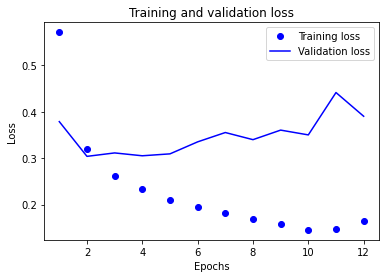

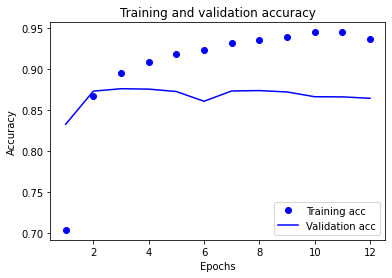

              precision    recall  f1-score   support

           0      0.877     0.868     0.873     12500
           1      0.869     0.879     0.874     12500

    accuracy                          0.873     25000
   macro avg      0.873     0.873     0.873     25000
weighted avg      0.873     0.873     0.873     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 11s 53ms/step - loss: 0.6317 - accuracy: 0.6484 - val_loss: 0.4088 - val_accuracy: 0.8322
Epoch 2/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3374 - accuracy: 0.8603 - val_loss: 0.3336 - val_accuracy: 0.8583
Epoch 3/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2445 - accuracy: 0.9035 - val_loss: 0.2927 - val_accuracy: 0.8810
Epoch 4/100
176/176 [==============================] - 9s 51ms/step - loss: 0.2412 - accuracy: 0.9069 - val_loss: 0.3329 - val_accuracy: 0.8658
Epoch 5/100
176/176 [==============================] - 9s 50ms/step - loss: 0.

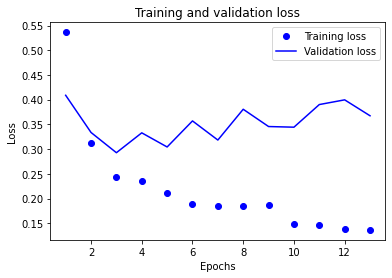

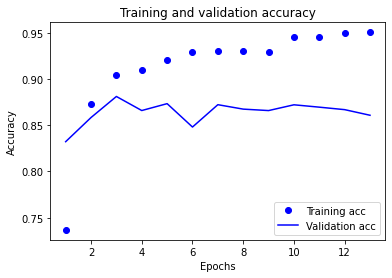

              precision    recall  f1-score   support

           0      0.893     0.866     0.879     12500
           1      0.870     0.896     0.883     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 11s 52ms/step - loss: 0.6427 - accuracy: 0.6270 - val_loss: 0.3669 - val_accuracy: 0.8492
Epoch 2/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3202 - accuracy: 0.8726 - val_loss: 0.3146 - val_accuracy: 0.8697
Epoch 3/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2685 - accuracy: 0.8943 - val_loss: 0.2942 - val_accuracy: 0.8802
Epoch 4/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2049 - accuracy: 0.9203 - val_loss: 0.3029 - val_accuracy: 0.8733
Epoch 5/100
176/176 [==============================] - 9s 50ms/step - loss: 0.

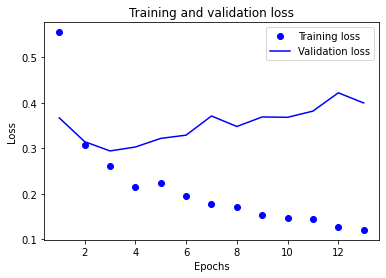

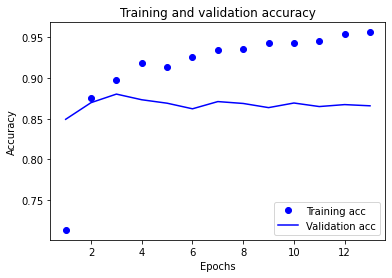

              precision    recall  f1-score   support

           0      0.887     0.871     0.879     12500
           1      0.874     0.889     0.881     12500

    accuracy                          0.880     25000
   macro avg      0.880     0.880     0.880     25000
weighted avg      0.880     0.880     0.880     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 11s 53ms/step - loss: 0.6703 - accuracy: 0.5725 - val_loss: 0.4050 - val_accuracy: 0.8260
Epoch 2/100
176/176 [==============================] - 9s 50ms/step - loss: 0.3498 - accuracy: 0.8552 - val_loss: 0.3016 - val_accuracy: 0.8751
Epoch 3/100
176/176 [==============================] - 9s 50ms/step - loss: 0.2504 - accuracy: 0.9043 - val_loss: 0.3692 - val_accuracy: 0.8429
Epoch 4/100
176/176 [==============================] - 9s 51ms/step - loss: 0.2475 - accuracy: 0.9053 - val_loss: 0.3495 - val_accuracy: 0.8694
Epoch 5/100
176/176 [==============================] - 9s 51ms/step - loss: 0

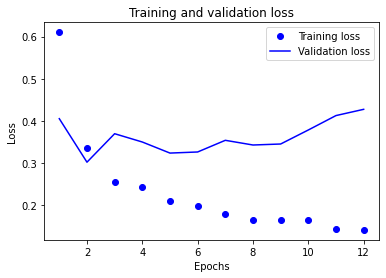

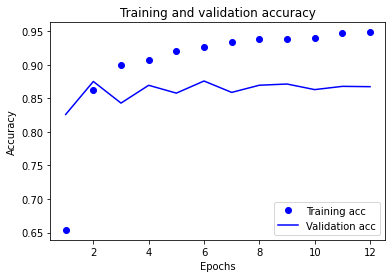

              precision    recall  f1-score   support

           0      0.899     0.846     0.871     12500
           1      0.854     0.905     0.879     12500

    accuracy                          0.875     25000
   macro avg      0.876     0.875     0.875     25000
weighted avg      0.876     0.875     0.875     25000


Average accuracy: 0.8804 (+/- 0.0076)
Average loss: 0.2938 (+/- 0.0122)
Average F1: 0.8784 (+/- 0.0030)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Dropout(rate=dropout_rate),
    LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
